# Studying Terrorism using GTD

### Cleaning data

In [1]:
import pandas as pd
import numpy as np

In [2]:
#check the encoding before reading csv file
with open('globalterrorismdb_0718dist.csv') as f:
    print(f)

<_io.TextIOWrapper name='globalterrorismdb_0718dist.csv' mode='r' encoding='cp1252'>


In [3]:
df_ter = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='cp1252' )

C:\Users\shpir\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
import copy
df_ter_copy = copy.deepcopy(df_ter)

In [5]:
df_ter.shape

(181691, 135)

In [6]:
df_ter.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
kill_wound = df_ter[['nkill','nwound', 'provstate','latitude','longitude']]

In [8]:
#dropping empty columns except nkill and nwound
df_ter = df_ter.dropna(axis='columns',how='any')

In [9]:
df_ter = pd.concat([df_ter,kill_wound], axis=1)

In [10]:
df_ter.shape

(181691, 34)

In [11]:
df_ter.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,...,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,nkill,nwound,provstate,latitude,longitude
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,...,PGIS,0,0,0,0,1.0,0.0,NaN,18.456792,-69.951164
1,197000000002,1970,0,0,0,130,Mexico,1,North America,0,...,PGIS,0,1,1,1,0.0,0.0,Federal,19.371887,-99.086624
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,0,...,PGIS,-9,-9,1,1,1.0,0.0,Tarlac,15.478598,120.599741
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,0,...,PGIS,-9,-9,1,1,NaN,NaN,Attica,37.997490,23.762728
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,0,...,PGIS,-9,-9,1,1,NaN,NaN,Fukouka,33.580412,130.396361


In [12]:
df_ter.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'vicinity', 'crit1', 'crit2',
       'crit3', 'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'targtype1', 'targtype1_txt', 'gname', 'individual', 'weaptype1',
       'weaptype1_txt', 'property', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY', 'nkill', 'nwound', 'provstate', 'latitude',
       'longitude'],
      dtype='object')

In [13]:
df_ter.isnull().any()


eventid            False
iyear              False
imonth             False
iday               False
extended           False
country            False
country_txt        False
region             False
region_txt         False
vicinity           False
crit1              False
crit2              False
crit3              False
success            False
suicide            False
attacktype1        False
attacktype1_txt    False
targtype1          False
targtype1_txt      False
gname              False
individual         False
weaptype1          False
weaptype1_txt      False
property           False
dbsource           False
INT_LOG            False
INT_IDEO           False
INT_MISC           False
INT_ANY            False
nkill               True
nwound              True
provstate           True
latitude            True
longitude           True
dtype: bool

In [14]:
df_ter.isnull().sum()

eventid                0
iyear                  0
imonth                 0
iday                   0
extended               0
country                0
country_txt            0
region                 0
region_txt             0
vicinity               0
crit1                  0
crit2                  0
crit3                  0
success                0
suicide                0
attacktype1            0
attacktype1_txt        0
targtype1              0
targtype1_txt          0
gname                  0
individual             0
weaptype1              0
weaptype1_txt          0
property               0
dbsource               0
INT_LOG                0
INT_IDEO               0
INT_MISC               0
INT_ANY                0
nkill              10313
nwound             16311
provstate            421
latitude            4556
longitude           4557
dtype: int64

In [15]:
#calculating the percentage of maximum nan values
16311/181691

0.08977329642084639

In [16]:
#removing about %9 of the data in dropping nans
df_ter = df_ter.dropna()
df_ter.shape

(160536, 34)

In [17]:
df_ter.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
extended           0
country            0
country_txt        0
region             0
region_txt         0
vicinity           0
crit1              0
crit2              0
crit3              0
success            0
suicide            0
attacktype1        0
attacktype1_txt    0
targtype1          0
targtype1_txt      0
gname              0
individual         0
weaptype1          0
weaptype1_txt      0
property           0
dbsource           0
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
nkill              0
nwound             0
provstate          0
latitude           0
longitude          0
dtype: int64

In [18]:
df_ter.to_csv('data_terrorism.csv')

In [19]:
df_ter.success.describe()

count    160536.000000
mean          0.880781
std           0.324047
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: success, dtype: float64

### Exploring and visualizing data

In [20]:
df_ter_sort = df_ter.sort_values(['nkill'], ascending=False)
#df_ter_countries = df_ter.groupby(['country'], as_index= False)
df_ter_sort.shape

(160536, 34)

In [21]:
regions_kill_wound= df_ter[['region','region_txt','nkill','nwound']].groupby('region', as_index=False).sum()
#df_ter['region_txt_abrrv] = ['North America', 'Central America_&_Caribbean', 'South America', 'East Asia', 'Southeast Asia', 'South Asia', 'Central Asia', 'Western Europe', 'Eastern Europe', 'Middle East', 'Sub_Saharan Africa', 'Australia' ]

In [22]:
regions_kill_wound

,region,nkill,nwound
0,1,4849.0,21512.0
1,2,22255.0,8041.0
2,3,24585.0,16131.0
3,4,818.0,9015.0
4,5,12602.0,24376.0
5,6,92117.0,138907.0
6,7,800.0,1858.0
7,8,4592.0,18076.0
8,9,6179.0,11799.0
9,10,113466.0,211972.0


In [23]:
import matplotlib.pyplot as plt
values = regions_kill_wound['nkill']
labels = ['North America', 'Central America_&_Caribbean', 'South America', 'East Asia', 'Southeast Asia', 'South Asia', 'Central Asia', 'Western Europe', 'Eastern Europe', 'Middle East', 'Sub_Saharan Africa', 'Australia']

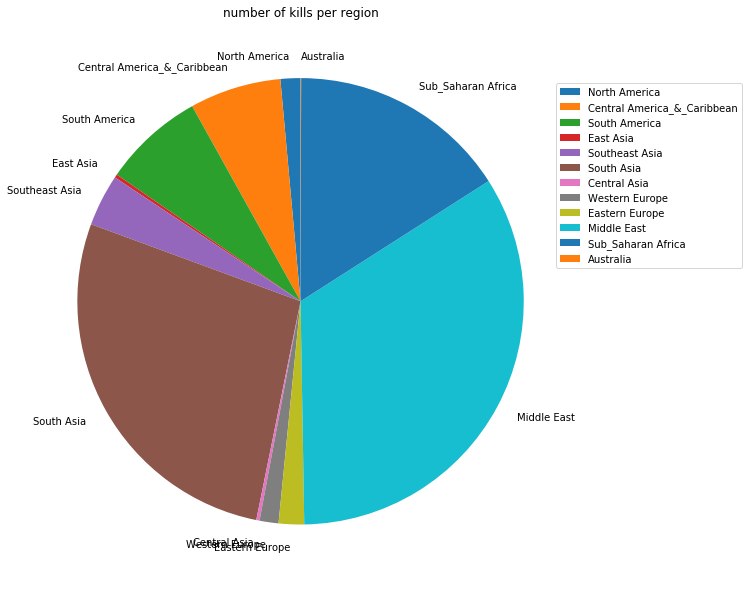

In [24]:
fig, ax = plt.subplots(figsize=(10, 20), subplot_kw=dict(aspect="equal"))
plt.pie (values, startangle=90, labels=labels)
#plt.pie (values, startangle=90, labels=labels, autopct='%.1f%%')
plt.legend(labels, loc = 'upper right', bbox_to_anchor=(1.3, 0.9))
plt.title('number of kills per region')
plt.show()

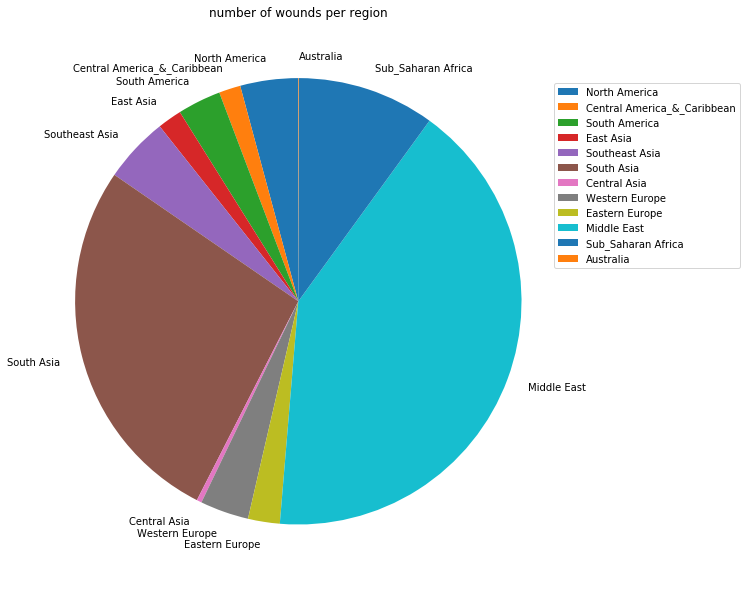

In [25]:
values = regions_kill_wound['nwound']
fig, ax = plt.subplots(figsize=(10, 20), subplot_kw=dict(aspect="equal"))
plt.pie (values, startangle=90, labels=labels)
#plt.pie (values, startangle=90, labels=labels, autopct='%.1f%%')
plt.legend(labels, loc = 'upper right', bbox_to_anchor=(1.3, 0.9))
plt.title('number of wounds per region')
plt.show()

In [26]:
#take a close look at the Middle East and South Asia
## Middle east region:
df_ter_ME = df_ter[df_ter['region'] == 10]
df_ter_ME.sort_values(by=['nkill'], ascending=False)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,...,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,nkill,nwound,provstate,latitude,longitude
133225,201406100042,2014,6,10,0,95,Iraq,10,Middle East & North Africa,0,...,START Primary Collection,0,1,0,1,670.0,0.0,Nineveh,36.407394,42.964626
6629,197808190004,1978,8,19,0,94,Iran,10,Middle East & North Africa,0,...,PGIS,0,1,0,1,422.0,0.0,Khuzestan,30.345997,48.287136
164327,201607020002,2016,7,3,0,95,Iraq,10,Middle East & North Africa,0,...,START Primary Collection,0,1,0,1,383.0,200.0,Baghdad,33.303566,44.371773
180708,201711240001,2017,11,24,0,60,Egypt,10,Middle East & North Africa,0,...,START Primary Collection,0,0,0,0,311.0,127.0,North Sinai,31.016779,33.008587
158654,201602070020,2016,2,7,0,95,Iraq,10,Middle East & North Africa,0,...,START Primary Collection,0,1,0,1,300.0,0.0,Nineveh,36.354145,43.143570
168368,201610220007,2016,10,21,1,95,Iraq,10,Middle East & North Africa,0,...,START Primary Collection,0,1,0,1,284.0,0.0,Nineveh,36.354145,43.143570
66454,199708280012,1997,8,28,0,6,Algeria,10,Middle East & North Africa,0,...,PGIS,-9,-9,0,-9,256.0,194.0,Blida,36.612427,3.124495
161437,201604210024,2016,4,21,0,95,Iraq,10,Middle East & North Africa,0,...,START Primary Collection,0,1,0,1,250.0,0.0,Nineveh,36.354145,43.143570
84018,200708160008,2007,8,14,0,95,Iraq,10,Middle East & North Africa,0,...,CETIS,0,0,0,0,250.0,750.0,Nineveh,36.183247,41.591599
84010,200708150005,2007,8,14,0,95,Iraq,10,Middle East & North Africa,0,...,CETIS,0,0,0,0,250.0,750.0,Nineveh,36.202354,41.687168


In [27]:
df_ter_ME.shape

(45909, 34)

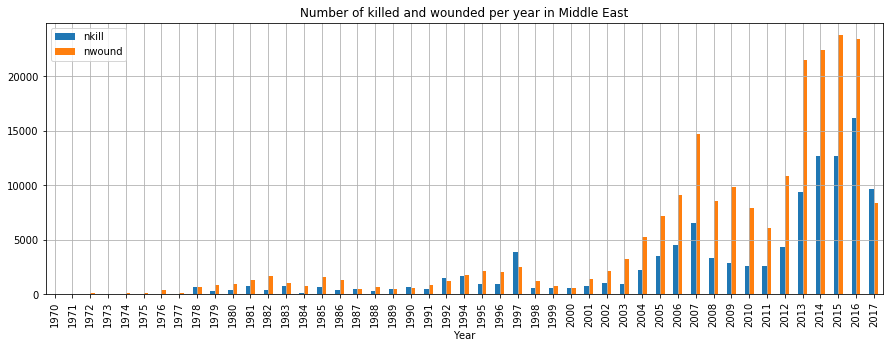

In [28]:
df_ter_ME_yr = df_ter_ME[['iyear','nkill', 'nwound']].groupby(['iyear'], as_index = False).sum()
ax = df_ter_ME_yr.set_index('iyear').plot(figsize=(15,5), kind='bar')
ax.set_xlabel('Year')
ax.set_title('Number of killed and wounded per year in Middle East')
ax.grid()

In [29]:
df_ter_ME_cty = df_ter_ME[['country','country_txt','nkill', 'nwound']]
df_ter_ME_cty = df_ter_ME_cty.groupby('country_txt', as_index= False).sum()


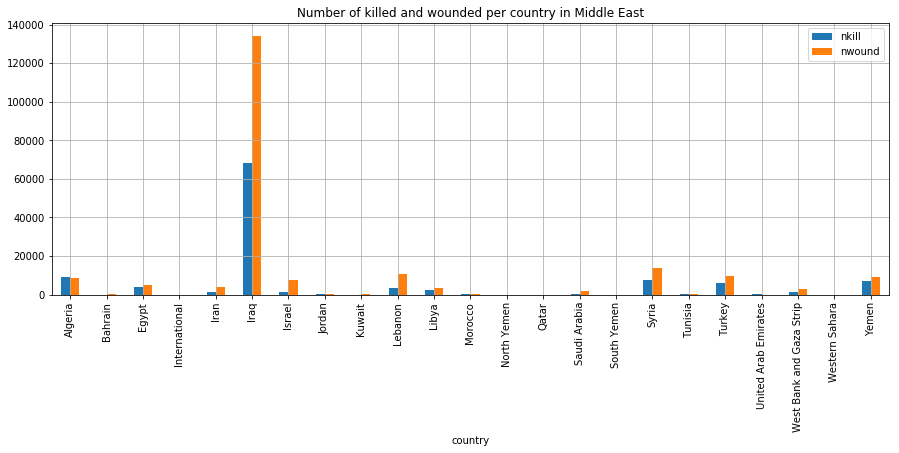

In [30]:
ax = df_ter_ME_cty.set_index('country').plot(figsize=(15,5), kind='bar')
ax.set_xticklabels(df_ter_ME_cty['country_txt'])
ax.set_title('Number of killed and wounded per country in Middle East')
ax.grid()                                                                                                                  

In [31]:

df_ter_ME_atck = df_ter_ME[['attacktype1_txt', 'attacktype1', 'nkill', 'nwound']].groupby('attacktype1_txt', as_index=False).sum()


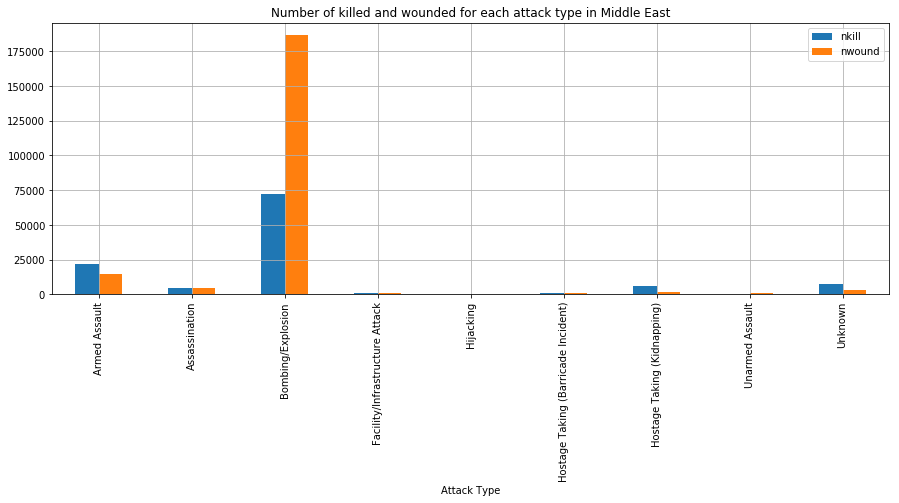

In [32]:
ax = df_ter_ME_atck.set_index('attacktype1').plot(figsize=(15,5), kind='bar')
ax.set_xticklabels(df_ter_ME_atck['attacktype1_txt'])     
ax.set_xlabel('Attack Type')
ax.set_title('Number of killed and wounded for each attack type in Middle East')
ax.grid()  

In [33]:
df_ter_ME_targ = df_ter_ME[['targtype1_txt', 'targtype1', 'nkill', 'nwound']].groupby('targtype1_txt', as_index=False).sum()


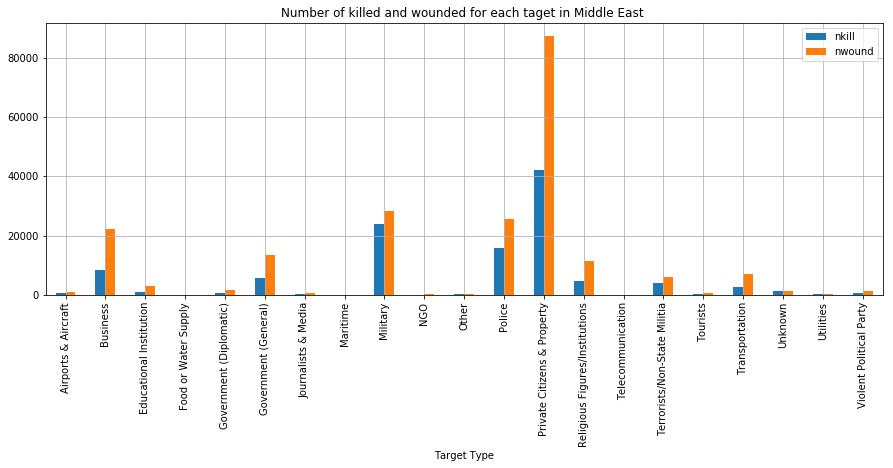

In [34]:
ax = df_ter_ME_targ.set_index('targtype1').plot(figsize=(15,5), kind='bar')
ax.set_xticklabels(df_ter_ME_targ['targtype1_txt'])     
ax.set_xlabel('Target Type')
ax.set_title('Number of killed and wounded for each taget in Middle East ')
ax.grid()  

In [35]:
df_ter_ME_wp = df_ter_ME[['weaptype1_txt', 'weaptype1', 'nkill', 'nwound']].groupby('weaptype1_txt', as_index=False).sum()

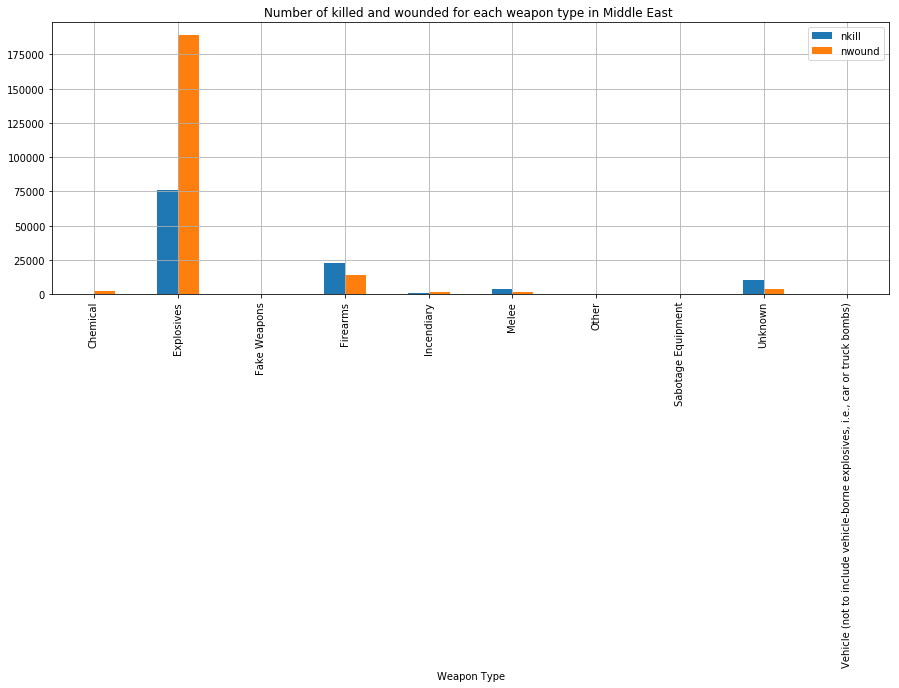

In [36]:
ax = df_ter_ME_wp.set_index('weaptype1').plot(figsize=(15,5), kind='bar')
ax.set_xticklabels(df_ter_ME_wp['weaptype1_txt'])     
ax.set_xlabel('Weapon Type')
ax.set_title('Number of killed and wounded for each weapon type in Middle East ')
ax.grid() 

In [37]:
#South Asia
df_ter_SA = df_ter[df_ter['region'] == 6]
df_ter_SA.sort_values(by=['nkill'], ascending=False)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,...,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,nkill,nwound,provstate,latitude,longitude
76347,200403210001,2004,3,21,0,141,Nepal,6,South Asia,0,...,CETIS,0,0,0,0,518.0,216.0,Central,27.959441,84.895897
174100,201704210001,2017,4,21,0,4,Afghanistan,6,South Asia,0,...,START Primary Collection,0,1,0,1,266.0,64.0,Balkh,36.709930,67.115700
153580,201509280037,2015,9,28,1,4,Afghanistan,6,South Asia,0,...,START Primary Collection,0,0,0,0,240.0,296.0,Kunduz,36.705776,68.877060
47238,199107150009,1991,7,15,0,186,Sri Lanka,6,South Asia,0,...,PGIS,0,0,0,0,200.0,0.0,North Eastern,9.433589,80.571195
81098,200607120001,2006,7,11,0,92,India,6,South Asia,0,...,CETIS,1,1,0,1,188.0,817.0,Maharashtra,19.075984,72.877656
141616,201412160002,2014,12,16,0,153,Pakistan,6,South Asia,0,...,START Primary Collection,0,0,0,0,158.0,121.0,Khyber Pakhtunkhwa,34.006004,71.537430
167692,201610030023,2016,10,3,1,4,Afghanistan,6,South Asia,0,...,START Primary Collection,0,0,0,0,154.0,120.0,Kunduz,36.705776,68.877060
25086,198505140012,1985,5,14,0,186,Sri Lanka,6,South Asia,0,...,PGIS,0,0,0,0,146.0,100.0,North Central,8.345185,80.388133
84481,200710180001,2007,10,18,0,153,Pakistan,6,South Asia,0,...,CETIS,0,1,0,1,141.0,250.0,Sindh,24.891115,67.143311
46868,199106170020,1991,6,17,0,186,Sri Lanka,6,South Asia,0,...,PGIS,0,0,0,0,140.0,0.0,Eastern,8.768889,80.302222


In [38]:
df_ter_SA.shape

(42519, 34)

Text(0.5,1,'Number of killed and wounded per year in South Asia')

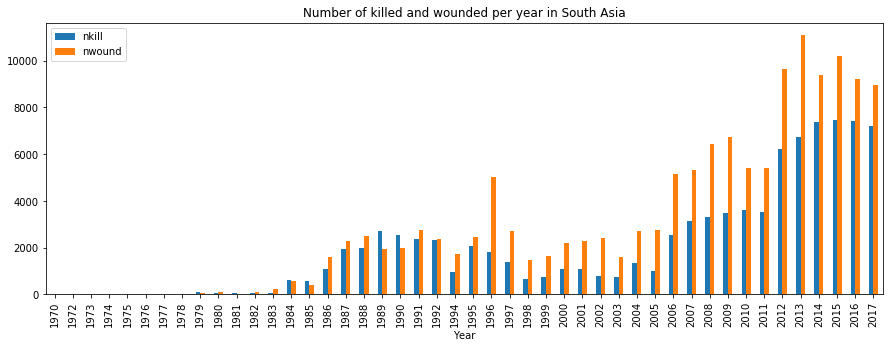

In [39]:
df_ter_SA_yr = df_ter_SA[['iyear','nkill', 'nwound']].groupby(['iyear'], as_index = False).sum()
ax = df_ter_SA_yr.set_index('iyear').plot(figsize=(15,5), kind='bar')
ax.set_xlabel('Year')
ax.set_title('Number of killed and wounded per year in South Asia')

In [40]:
df_ter_SA_cty = df_ter_SA[['country','country_txt','nkill', 'nwound']]
df_ter_SA_cty = df_ter_SA_cty.groupby('country_txt', as_index= False).sum()

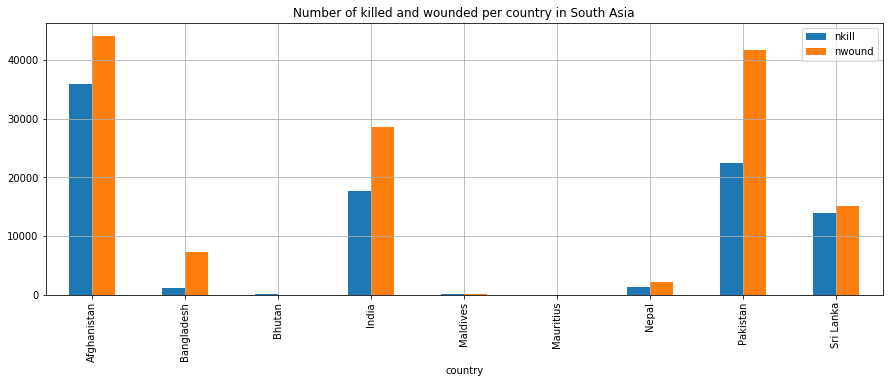

In [41]:
ax = df_ter_SA_cty.set_index('country').plot(figsize=(15,5), kind='bar')
ax.set_xticklabels(df_ter_SA_cty['country_txt'])
ax.set_title('Number of killed and wounded per country in South Asia')
ax.grid() 

In [42]:
df_ter_SA_atck = df_ter_SA[['attacktype1_txt', 'attacktype1', 'nkill', 'nwound']].groupby('attacktype1_txt', as_index=False).sum()

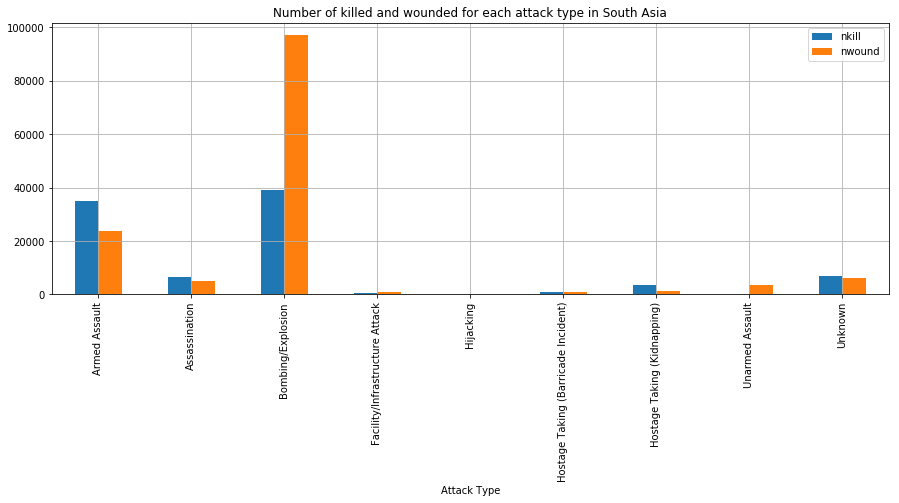

In [43]:
ax = df_ter_SA_atck.set_index('attacktype1').plot(figsize=(15,5), kind='bar')
ax.set_xticklabels(df_ter_SA_atck['attacktype1_txt'])     
ax.set_xlabel('Attack Type')
ax.set_title('Number of killed and wounded for each attack type in South Asia')
ax.grid()  

In [44]:
df_ter_SA_targ = df_ter_SA[['targtype1_txt', 'targtype1', 'nkill', 'nwound']].groupby('targtype1_txt', as_index=False).sum()

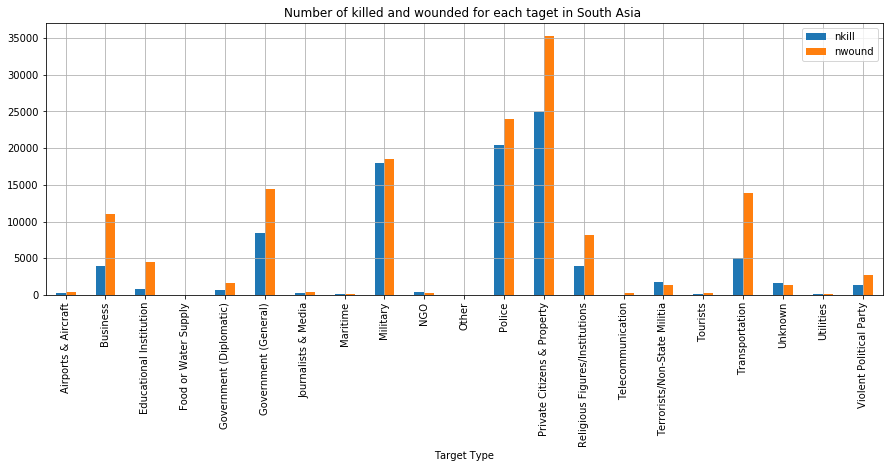

In [45]:
ax = df_ter_SA_targ.set_index('targtype1').plot(figsize=(15,5), kind='bar')
ax.set_xticklabels(df_ter_SA_targ['targtype1_txt'])     
ax.set_xlabel('Target Type')
ax.set_title('Number of killed and wounded for each taget in South Asia ')
ax.grid()  

In [46]:
df_ter_SA_wp = df_ter_SA[['weaptype1_txt', 'weaptype1', 'nkill', 'nwound']].groupby('weaptype1_txt', as_index=False).sum()

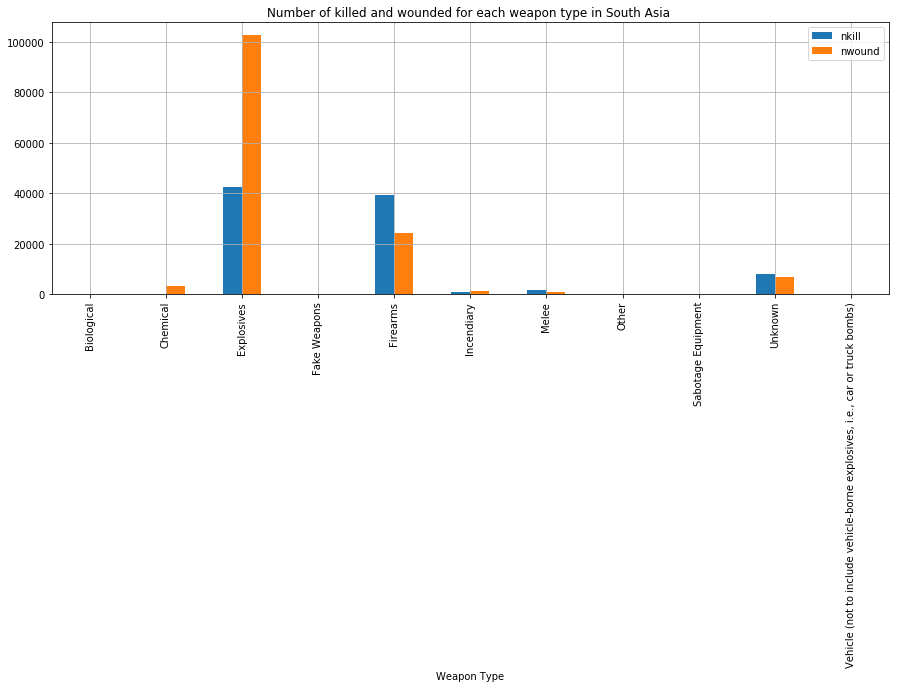

In [47]:
ax = df_ter_SA_wp.set_index('weaptype1').plot(figsize=(15,5), kind='bar')
ax.set_xticklabels(df_ter_SA_wp['weaptype1_txt'])     
ax.set_xlabel('Weapon Type')
ax.set_title('Number of killed and wounded for each weapon type in South Asia ')
ax.grid() 

## Prediction of 1993

In [77]:
#prediction of 1993 for middle east and south asia
df_ME_SA = pd.concat([df_ter_ME, df_ter_SA], axis=0)


In [79]:
df_ME_SA.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
extended           0
country            0
country_txt        0
region             0
region_txt         0
vicinity           0
crit1              0
crit2              0
crit3              0
success            0
suicide            0
attacktype1        0
attacktype1_txt    0
targtype1          0
targtype1_txt      0
gname              0
individual         0
weaptype1          0
weaptype1_txt      0
property           0
dbsource           0
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
nkill              0
nwound             0
provstate          0
latitude           0
longitude          0
dtype: int64

#### making dummy variables

In [80]:
df_dummies_country = pd.get_dummies(df_ME_SA['country'])
df_dummies_year = pd.get_dummies(df_ME_SA['iyear'])
df_dummies_weapon = pd.get_dummies(df_ME_SA['weaptype1'])
df_dummies_target = pd.get_dummies(df_ME_SA['targtype1'])
df_dummies_attack = pd.get_dummies(df_ME_SA['attacktype1'])

df_dummies_all = pd.concat([df_dummies_country, df_dummies_year, df_dummies_weapon, df_dummies_target, df_dummies_attack], axis=1)

In [121]:
#setting x and y 
x = df_dummies_all
y = pd.get_dummies(df_ME_SA['nkill'])

In [143]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score, cross_val_predict

In [123]:
#splitting data 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [86]:
X_train.shape

(61899, 120)

In [88]:
X_test.shape

(26529, 120)

In [91]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
pred = lm.predict(X_test)

In [132]:
#mean squared error (MSE)
a = np.mean((pred-y_test)**2)

In [ ]:
a

In [145]:
np.mean(a)

0.004415439519154127